In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from path import Path
import numpy as np

In [2]:
# File to Load 
file = "methane_hist_emissions.csv"
methane_emissions = pd.read_csv(file, index_col=0)

In [3]:
methane_emissions.head()

,Sector,Gas,Unit,2018,2017,2016,2015,2014,2013,2012,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
Country,,,,,,,,,,,,,,,,,,,,,
China,Total including LUCF,CH4,MTCO2e,1238.95,1239.28,1242.43,1237.79,1206.51,1178.21,1151.28,...,826.57,814.80,792.55,824.63,798.90,774.10,758.01,752.10,743.51,730.78
China,Total excluding LUCF,CH4,MTCO2e,1238.63,1239.13,1242.15,1237.52,1206.21,1178.02,1151.10,...,825.69,813.83,791.73,823.86,798.45,773.65,757.56,751.66,743.07,730.34
Russia,Total including LUCF,CH4,MTCO2e,853.00,852.12,856.00,837.01,833.59,827.06,827.98,...,604.57,606.50,614.99,634.53,643.52,670.71,728.51,784.68,867.35,933.79
Russia,Total excluding LUCF,CH4,MTCO2e,849.57,850.17,852.55,835.56,830.22,825.64,824.27,...,598.70,597.72,610.38,622.22,639.73,666.92,724.72,780.89,863.52,929.97
China,Energy,CH4,MTCO2e,739.58,741.73,743.88,746.03,723.02,700.01,677.00,...,303.13,289.36,275.59,261.82,248.05,234.28,229.86,225.44,221.02,216.60


In [4]:
# Drop unused columns
methane_emissions_df = methane_emissions.drop(columns=["Gas", "Unit"], axis =1)
methane_emissions_df.head()

,Sector,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
Country,,,,,,,,,,,,,,,,,,,,,
China,Total including LUCF,1238.95,1239.28,1242.43,1237.79,1206.51,1178.21,1151.28,1106.41,1064.20,...,826.57,814.80,792.55,824.63,798.90,774.10,758.01,752.10,743.51,730.78
China,Total excluding LUCF,1238.63,1239.13,1242.15,1237.52,1206.21,1178.02,1151.10,1106.19,1063.83,...,825.69,813.83,791.73,823.86,798.45,773.65,757.56,751.66,743.07,730.34
Russia,Total including LUCF,853.00,852.12,856.00,837.01,833.59,827.06,827.98,817.70,804.22,...,604.57,606.50,614.99,634.53,643.52,670.71,728.51,784.68,867.35,933.79
Russia,Total excluding LUCF,849.57,850.17,852.55,835.56,830.22,825.64,824.27,814.67,801.36,...,598.70,597.72,610.38,622.22,639.73,666.92,724.72,780.89,863.52,929.97
China,Energy,739.58,741.73,743.88,746.03,723.02,700.01,677.00,635.32,593.65,...,303.13,289.36,275.59,261.82,248.05,234.28,229.86,225.44,221.02,216.60


In [5]:
# Find data types
methane_emissions_df.dtypes

Sector     object
2018      float64
2017      float64
2016      float64
2015      float64
2014      float64
2013      float64
2012      float64
2011      float64
2010      float64
2009      float64
2008      float64
2007      float64
2006      float64
2005      float64
2004      float64
2003      float64
2002      float64
2001      float64
2000      float64
1999      float64
1998      float64
1997      float64
1996      float64
1995      float64
1994      float64
1993      float64
1992      float64
1991      float64
1990      float64
dtype: object

In [6]:
# Explore null emissions values
methane_emissions_df.isnull().sum()

Sector    0
2018      0
2017      0
2016      0
2015      0
2014      0
2013      0
2012      0
2011      0
2010      0
2009      0
2008      0
2007      0
2006      0
2005      0
2004      0
2003      0
2002      0
2001      0
2000      0
1999      0
1998      0
1997      0
1996      0
1995      0
1994      0
1993      0
1992      0
1991      0
1990      9
dtype: int64

In [7]:
# Create a list of countries from methane_emission_df 
countries = []
for country in methane_emissions_df.index.unique():
    countries.append(country)
sorted(countries)

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 "Côte d'Ivoire",
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'European Union (27)',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 

In [8]:
len(countries)

195

In [9]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Oxana\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [10]:
# GDP data to Load 
file = "World GDP Data.xls"
GDP = pd.read_excel(file, index_col=0)
GDP.head()

,Country Code,Region,IncomeGroup,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,Latin America & Caribbean,High income,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,...,2.549721e+09,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN
Africa Eastern and Southern,AFE,NaN,NaN,GDP (current US$),NY.GDP.MKTP.CD,1.931311e+10,1.972349e+10,2.149392e+10,2.573321e+10,2.352744e+10,...,9.433782e+11,9.505214e+11,9.642424e+11,9.848071e+11,9.199300e+11,8.733549e+11,9.853557e+11,1.012853e+12,1.009910e+12,9.207923e+11
Afghanistan,AFG,South Asia,Low income,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,...,1.780511e+10,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10
Africa Western and Central,AFW,NaN,NaN,GDP (current US$),NY.GDP.MKTP.CD,1.040428e+10,1.112805e+10,1.194335e+10,1.267652e+10,1.383858e+10,...,6.709626e+11,7.275714e+11,8.207876e+11,8.649666e+11,7.607297e+11,6.905430e+11,6.837416e+11,7.416916e+11,7.945725e+11,7.845876e+11
Angola,AGO,Sub-Saharan Africa,Lower middle income,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,...,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.941719e+10,5.837598e+10


In [11]:
# Drop unused GDP columns
GDP_df = GDP.drop(columns = ["Country Code", "Indicator Name", "Indicator Code", "2019", "2020"])
GDP_df

,Region,IncomeGroup,1960,1961,1962,1963,1964,1965,1966,1967,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,Latin America & Caribbean,High income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.498883e+09,2.390503e+09,2.549721e+09,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09
Africa Eastern and Southern,NaN,NaN,1.931311e+10,1.972349e+10,2.149392e+10,2.573321e+10,2.352744e+10,2.681057e+10,2.915216e+10,3.017317e+10,...,7.125580e+11,8.474095e+11,9.433782e+11,9.505214e+11,9.642424e+11,9.848071e+11,9.199300e+11,8.733549e+11,9.853557e+11,1.012853e+12
Afghanistan,South Asia,Low income,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,...,1.241616e+10,1.585668e+10,1.780511e+10,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10
Africa Western and Central,NaN,NaN,1.040428e+10,1.112805e+10,1.194335e+10,1.267652e+10,1.383858e+10,1.486247e+10,1.583285e+10,1.442643e+10,...,5.069964e+11,5.915830e+11,6.709626e+11,7.275714e+11,8.207876e+11,8.649666e+11,7.607297e+11,6.905430e+11,6.837416e+11,7.416916e+11
Angola,Sub-Saharan Africa,Lower middle income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.030716e+10,8.379950e+10,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,Europe & Central Asia,Upper middle income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.015895e+09,5.344014e+09,6.341737e+09,6.163785e+09,6.735731e+09,7.074658e+09,6.295820e+09,6.682833e+09,7.180813e+09,7.878509e+09
"Yemen, Rep.",Middle East & North Africa,Low income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.513027e+10,3.090675e+10,3.272642e+10,3.540134e+10,4.041524e+10,4.322859e+10,4.244510e+10,3.131737e+10,2.684013e+10,2.160614e+10
South Africa,Sub-Saharan Africa,Upper middle income,7.575397e+09,7.972997e+09,8.497997e+09,9.423396e+09,1.037400e+10,1.133440e+10,1.235500e+10,1.377739e+10,...,3.297530e+11,4.173651e+11,4.582015e+11,4.344005e+11,4.008860e+11,3.811989e+11,3.467098e+11,3.235855e+11,3.814488e+11,4.048421e+11


In [12]:
# Find data types
GDP_df.dtypes

Region          object
IncomeGroup     object
1960           float64
1961           float64
1962           float64
                ...   
2014           float64
2015           float64
2016           float64
2017           float64
2018           float64
Length: 61, dtype: object

In [13]:
# Explore null GDP values
GDP_df.isnull().sum()

Region          48
IncomeGroup     49
1960           137
1961           131
1962           128
              ... 
2014             7
2015             8
2016             9
2017             9
2018             9
Length: 61, dtype: int64

In [14]:
# Drop rows with countries that don't have emission data
GDP_df_same = GDP_df[GDP_df.index.isin(countries)]
GDP_df_same

,Region,IncomeGroup,1960,1961,1962,1963,1964,1965,1966,1967,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,South Asia,Low income,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,...,1.241616e+10,1.585668e+10,1.780511e+10,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10
Angola,Sub-Saharan Africa,Lower middle income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.030716e+10,8.379950e+10,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11
Albania,Europe & Central Asia,Upper middle income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.204421e+10,1.192692e+10,1.289076e+10,1.231983e+10,1.277622e+10,1.322815e+10,1.138685e+10,1.186120e+10,1.301969e+10,1.515643e+10
Andorra,Europe & Central Asia,High income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.674410e+09,3.449967e+09,3.629204e+09,3.188809e+09,3.193704e+09,3.271808e+09,2.789870e+09,2.896679e+09,3.000181e+09,3.218316e+09
United Arab Emirates,Middle East & North Africa,High income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.535474e+11,2.897873e+11,3.506660e+11,3.745906e+11,3.901076e+11,4.031371e+11,3.581351e+11,3.570451e+11,3.856055e+11,4.222150e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
World,NaN,NaN,1.387318e+12,1.443856e+12,1.545481e+12,1.666138e+12,1.824277e+12,1.987340e+12,2.156806e+12,2.294908e+12,...,6.073036e+13,6.648828e+13,7.365375e+13,7.531228e+13,7.743951e+13,7.955766e+13,7.511244e+13,7.630506e+13,8.119329e+13,8.626760e+13
Samoa,East Asia & Pacific,Lower middle income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.847060e+08,6.631560e+08,7.371480e+08,7.603193e+08,7.700596e+08,7.568059e+08,7.879586e+08,7.994939e+08,8.320256e+08,8.212869e+08
South Africa,Sub-Saharan Africa,Upper middle income,7.575397e+09,7.972997e+09,8.497997e+09,9.423396e+09,1.037400e+10,1.133440e+10,1.235500e+10,1.377739e+10,...,3.297530e+11,4.173651e+11,4.582015e+11,4.344005e+11,4.008860e+11,3.811989e+11,3.467098e+11,3.235855e+11,3.814488e+11,4.048421e+11


In [15]:
# See what countries have probably different spelling
GDP_rest = GDP_df[~GDP_df.index.isin(countries)]
sorted(GDP_rest.index.unique())

['Africa Eastern and Southern',
 'Africa Western and Central',
 'American Samoa',
 'Arab World',
 'Aruba',
 'Bahamas, The',
 'Bermuda',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Cabo Verde',
 'Caribbean small states',
 'Cayman Islands',
 'Central Europe and the Baltics',
 'Channel Islands',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Curacao',
 'Early-demographic dividend',
 'East Asia & Pacific',
 'East Asia & Pacific (IDA & IBRD countries)',
 'East Asia & Pacific (excluding high income)',
 'Egypt, Arab Rep.',
 'Euro area',
 'Europe & Central Asia',
 'Europe & Central Asia (IDA & IBRD countries)',
 'Europe & Central Asia (excluding high income)',
 'European Union',
 'Faroe Islands',
 'Fragile and conflict affected situations',
 'French Polynesia',
 'Gambia, The',
 'Gibraltar',
 'Greenland',
 'Guam',
 'Heavily indebted poor countries (HIPC)',
 'High income',
 'Hong Kong SAR, China',
 'IBRD only',
 'IDA & IBRD total',
 'IDA blend',
 'IDA only',
 'IDA total',
 'Iran

In [16]:
# Correct spelling in GDP_df
GDP_clean = GDP_df.rename(index={'Bahamas, The': "Bahamas", 
                                 'Brunei Darussalam': "Brunei", 
                                 'Egypt, Arab Rep.': "Egypt", 
                                 'Gambia, The': 'Gambia',
                                 'Iran, Islamic Rep.': 'Iran',
                                 'Micronesia, Fed. Sts.': 'Micronesia',
                                 'Russian Federation': 'Russia',
                                 'Syrian Arab Republic': 'Syria',
                                 'Venezuela, RB': 'Venezuela',
                                 'Yemen, Rep.': 'Yemen'})

In [17]:
# Correct spelling in methate_emissions_df
methane_clean = methane_emissions_df.rename(index={'Democratic Republic of the Congo': 'Congo, Dem. Rep.',
                                                  'Kyrgyzstan': 'Kyrgyz Republic',
                                                  'Laos': 'Lao PDR',
                                                  'Republic of Congo': 'Congo, Rep.',
                                                  'Saint Kitts and Nevis': 'St. Kitts and Nevis',
                                                  'Saint Lucia': 'St. Lucia',
                                                  'Saint Vincent and the Grenadines': 'St. Vincent and the Grenadines',
                                                  'Slovakia': 'Slovak Republic',
                                                  'European Union (27)': 'European Union'})

In [18]:
# Create a list of countries with corrected spelling
all_countries = []
for country in methane_clean.index.unique():
    all_countries.append(country)
sorted(all_countries)

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 "Côte d'Ivoire",
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'European Union',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guya

In [19]:
# Drop rows with countries that don't have emission data (with corrected country names)
GDP_same = GDP_clean[GDP_clean.index.isin(all_countries)]
GDP_same

,Region,IncomeGroup,1960,1961,1962,1963,1964,1965,1966,1967,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,South Asia,Low income,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,...,1.241616e+10,1.585668e+10,1.780511e+10,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10
Angola,Sub-Saharan Africa,Lower middle income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.030716e+10,8.379950e+10,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11
Albania,Europe & Central Asia,Upper middle income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.204421e+10,1.192692e+10,1.289076e+10,1.231983e+10,1.277622e+10,1.322815e+10,1.138685e+10,1.186120e+10,1.301969e+10,1.515643e+10
Andorra,Europe & Central Asia,High income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.674410e+09,3.449967e+09,3.629204e+09,3.188809e+09,3.193704e+09,3.271808e+09,2.789870e+09,2.896679e+09,3.000181e+09,3.218316e+09
United Arab Emirates,Middle East & North Africa,High income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.535474e+11,2.897873e+11,3.506660e+11,3.745906e+11,3.901076e+11,4.031371e+11,3.581351e+11,3.570451e+11,3.856055e+11,4.222150e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samoa,East Asia & Pacific,Lower middle income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.847060e+08,6.631560e+08,7.371480e+08,7.603193e+08,7.700596e+08,7.568059e+08,7.879586e+08,7.994939e+08,8.320256e+08,8.212869e+08
Yemen,Middle East & North Africa,Low income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.513027e+10,3.090675e+10,3.272642e+10,3.540134e+10,4.041524e+10,4.322859e+10,4.244510e+10,3.131737e+10,2.684013e+10,2.160614e+10
South Africa,Sub-Saharan Africa,Upper middle income,7.575397e+09,7.972997e+09,8.497997e+09,9.423396e+09,1.037400e+10,1.133440e+10,1.235500e+10,1.377739e+10,...,3.297530e+11,4.173651e+11,4.582015e+11,4.344005e+11,4.008860e+11,3.811989e+11,3.467098e+11,3.235855e+11,3.814488e+11,4.048421e+11


In [20]:
# Check for null values in GDP_same DataFrame
GDP_same.isnull().sum()

Region          2
IncomeGroup     3
1960           94
1961           91
1962           88
               ..
2014            1
2015            2
2016            3
2017            3
2018            3
Length: 61, dtype: int64

In [21]:
# Drop years with multiple missing GDP data
GDP_2000 = GDP_same.drop(columns = ["1990","1991","1992","1993","1994","1995","1996","1997","1998","1999"])
GDP_2000

,Region,IncomeGroup,1960,1961,1962,1963,1964,1965,1966,1967,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,South Asia,Low income,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,...,1.241616e+10,1.585668e+10,1.780511e+10,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10
Angola,Sub-Saharan Africa,Lower middle income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.030716e+10,8.379950e+10,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11
Albania,Europe & Central Asia,Upper middle income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.204421e+10,1.192692e+10,1.289076e+10,1.231983e+10,1.277622e+10,1.322815e+10,1.138685e+10,1.186120e+10,1.301969e+10,1.515643e+10
Andorra,Europe & Central Asia,High income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.674410e+09,3.449967e+09,3.629204e+09,3.188809e+09,3.193704e+09,3.271808e+09,2.789870e+09,2.896679e+09,3.000181e+09,3.218316e+09
United Arab Emirates,Middle East & North Africa,High income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.535474e+11,2.897873e+11,3.506660e+11,3.745906e+11,3.901076e+11,4.031371e+11,3.581351e+11,3.570451e+11,3.856055e+11,4.222150e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samoa,East Asia & Pacific,Lower middle income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.847060e+08,6.631560e+08,7.371480e+08,7.603193e+08,7.700596e+08,7.568059e+08,7.879586e+08,7.994939e+08,8.320256e+08,8.212869e+08
Yemen,Middle East & North Africa,Low income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.513027e+10,3.090675e+10,3.272642e+10,3.540134e+10,4.041524e+10,4.322859e+10,4.244510e+10,3.131737e+10,2.684013e+10,2.160614e+10
South Africa,Sub-Saharan Africa,Upper middle income,7.575397e+09,7.972997e+09,8.497997e+09,9.423396e+09,1.037400e+10,1.133440e+10,1.235500e+10,1.377739e+10,...,3.297530e+11,4.173651e+11,4.582015e+11,4.344005e+11,4.008860e+11,3.811989e+11,3.467098e+11,3.235855e+11,3.814488e+11,4.048421e+11


In [22]:
# Exporting merged_transposed data in csv to get null values
# GDP_2000.to_csv("GDP_2000.csv", index = True)

In [23]:
# Read in normalized GDP data after filling in the NaNs, deleting of South Sudan and dividing by 1000000000
file = "GDP_2000_normalized.csv"
GDP_2000_normalized = pd.read_csv(file, index_col=0)

In [24]:
# Create a list of countries from methane_clean dataframe
same_countries = []
for country in GDP_2000_normalized.index.unique():
    same_countries.append(country)
sorted(same_countries)

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'European Union',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hungary',
 'Iceland'

In [25]:
# Filter methane_clean dataframe for same country names as in GDP_same dataframe
methane_same = methane_clean[methane_clean.index.isin(same_countries)]
len(methane_same.index.unique())

187

In [26]:
# Drop years with multiple missing GDP data
methane_2000 = methane_same.drop(columns = ["1990","1991","1992","1993","1994","1995","1996","1997","1998","1999"])
methane_2000

,Sector,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
Country,,,,,,,,,,,,,,,,,,,,
China,Total including LUCF,1238.95,1239.28,1242.43,1237.79,1206.51,1178.21,1151.28,1106.41,1064.20,1019.28,974.42,921.86,883.58,837.94,830.23,816.62,820.09,824.52,830.59
China,Total excluding LUCF,1238.63,1239.13,1242.15,1237.52,1206.21,1178.02,1151.10,1106.19,1063.83,1018.91,973.58,921.56,883.36,837.67,829.70,815.91,819.89,824.17,829.61
Russia,Total including LUCF,853.00,852.12,856.00,837.01,833.59,827.06,827.98,817.70,804.22,776.75,798.54,792.59,783.56,767.29,756.60,723.10,671.19,643.60,623.67
Russia,Total excluding LUCF,849.57,850.17,852.55,835.56,830.22,825.64,824.27,814.67,801.36,774.47,793.09,791.13,780.69,765.48,752.80,719.38,669.09,642.04,617.06
China,Energy,739.58,741.73,743.88,746.03,723.02,700.01,677.00,635.32,593.65,552.07,510.49,468.91,427.33,385.75,371.98,358.21,344.44,330.67,316.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samoa,Land-Use Change and Forestry,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Samoa,Fugitive Emissions,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Yemen,Industrial Processes,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [27]:
# Transpose indices and column headers in methane emission dataframe
df_transposed = methane_2000.copy(deep=True)
df_transposed = df_transposed.groupby([df_transposed.index,'Sector']).mean().transpose()
df_transposed.head()

Country Afghanistan                                                 \
Sector  Agriculture Energy Fugitive Emissions Industrial Processes   
2018          10.45  67.91               2.22                  0.0   
2017          10.33  66.21               2.21                  0.0   
2016          10.63  64.51               2.19                  0.0   
2015          10.85  62.82               2.18                  0.0   
2014          11.48  53.45               1.98                  0.0   

Country                                                     \
Sector  Land-Use Change and Forestry Other Fuel Combustion   
2018                             0.0                 65.69   
2017                             0.0                 64.00   
2016                             0.0                 62.32   
2015                             0.0                 60.64   
2014                             0.0                 51.47   

Country                                                     Albania  ...  \
Sector  Total excluding LUCF Total including LUCF Waste Agriculture  ...   
2018                   81.51                81.51  3.15        2.01  ...   
2017                   79.61                79.61  3.08        2.05  ...   
2016                   78.15                78.15  3.00        2.10  ...   
2015                   76.59                76.59  2.93        2.11  ...   
2014                   67.77                67.77  2.84        2.10  ...   

Country Zambia    Zimbabwe                                                 \
Sector   Waste Agriculture Energy Fugitive Emissions Industrial Processes   
2018      3.42        6.43   2.52               0.71                 0.48   
2017      3.32        6.23   2.48               0.70                 0.48   
2016      3.21        6.14   2.44               0.68                 0.48   
2015      3.10        6.64   2.40               0.66                 0.48   
2014      3.01        5.89   2.22               0.60                 0.48   

Country                                                     \
Sector  Land-Use Change and Forestry Other Fuel Combustion   
2018                            0.11                  1.81   
2017                            0.06                  1.78   
2016                            0.11                  1.76   
2015                            0.14                  1.74   
2014                            0.08                  1.61   

Country                                                  
Sector  Total excluding LUCF Total including LUCF Waste  
2018                   11.85                11.96  2.42  
2017                   11.56                11.62  2.37  
2016                   11.38                11.50  2.32  
2015                   11.79                11.93  2.27  
2014                   10.82                10.90  2.23  

[5 rows x 1676 columns]

In [28]:
# Transpose indices and column headers in GDP dataframe
gdp_transposed = GDP_2000_normalized.copy(deep=True)
gdp_transposed = gdp_transposed.transpose()
gdp_transposed = gdp_transposed.rename(columns={col:(col, 'GDP') for col in gdp_transposed.columns})
gdp_transposed.head()

Country Name,"(Afghanistan, GDP)","(Angola, GDP)","(Albania, GDP)","(Andorra, GDP)","(United Arab Emirates, GDP)","(Argentina, GDP)","(Armenia, GDP)","(Antigua and Barbuda, GDP)","(Australia, GDP)","(Austria, GDP)",...,"(St. Vincent and the Grenadines, GDP)","(Venezuela, GDP)","(Vietnam, GDP)","(Vanuatu, GDP)","(World, GDP)","(Samoa, GDP)","(Yemen, GDP)","(South Africa, GDP)","(Zambia, GDP)","(Zimbabwe, GDP)"
2000,3.532000,9.129635,3.480355,1.429049,104.337372,284.203750,1.911564,0.826370,415.576211,196.799779,...,0.396263,117.140723,31.172518,0.272015,33815.96550,0.269020,9.652436,151.753369,3.600683,6.689958
2001,2.462000,8.936064,3.922101,1.546926,103.311641,268.696750,2.118468,0.800481,379.083933,197.337879,...,0.430041,122.903960,32.685199,0.257927,33609.21143,0.273088,9.861560,135.429607,4.094481,6.777385
2002,4.055180,15.285595,4.348068,1.755910,109.816202,97.724004,2.376335,0.814381,395.342717,213.377771,...,0.461885,92.893588,35.064105,0.262597,34884.36846,0.288079,10.694628,129.088132,4.193846,6.342116
2003,4.515559,17.812705,5.611496,2.361727,124.346358,127.586973,2.807061,0.856396,467.390798,261.695779,...,0.481807,83.620629,39.552513,0.314471,39128.64076,0.338839,11.777967,197.020241,4.901840,5.727592
2004,5.226779,23.552052,7.184686,2.894922,147.824370,164.657930,3.576615,0.919730,614.166311,300.904222,...,0.521974,112.453382,45.427855,0.364997,44095.86427,0.420320,13.872792,255.806631,6.221078,5.805598


In [29]:
# Plot
#df_transposed.plot(kind='line', legend=False, figsize=(20,20))


In [30]:
# Merge methane and GDP transposet dataframes
merged = df_transposed.merge(gdp_transposed,how="left", right_index=True, left_index=True, validate="one_to_one")
cols = pd.MultiIndex.from_tuples([(x,y) for x,y in merged.columns])

merged = merged.transpose().reindex(cols)
merged.transpose().head()
#merged = merged.dropna(axis=0, how='any')


C:\Users\Oxana\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py:9190: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left,1 on the right)
  return merge(


Afghanistan                                                 \
     Agriculture Energy Fugitive Emissions Industrial Processes   
2018       10.45  67.91               2.22                  0.0   
2017       10.33  66.21               2.21                  0.0   
2016       10.63  64.51               2.19                  0.0   
2015       10.85  62.82               2.18                  0.0   
2014       11.48  53.45               1.98                  0.0   

                                                                              \
     Land-Use Change and Forestry Other Fuel Combustion Total excluding LUCF   
2018                          0.0                 65.69                81.51   
2017                          0.0                 64.00                79.61   
2016                          0.0                 62.32                78.15   
2015                          0.0                 60.64                76.59   
2014                          0.0                 51.47                67.77   

                                    Albania  ...  \
     Total including LUCF Waste Agriculture  ...   
2018                81.51  3.15        2.01  ...   
2017                79.61  3.08        2.05  ...   
2016                78.15  3.00        2.10  ...   
2015                76.59  2.93        2.11  ...   
2014                67.77  2.84        2.10  ...   

     St. Vincent and the Grenadines Venezuela     Vietnam   Vanuatu  \
                                GDP       GDP         GDP       GDP   
2018                       0.811300    98.400  245.213686  0.914728   
2017                       0.792178   143.841  223.779866  0.880044   
2016                       0.774430   279.249  205.276172  0.780890   
2015                       0.755400   323.595  193.241109  0.730871   
2014                       0.727715   203.822  186.204653  0.772316   

            World     Samoa      Yemen South Africa     Zambia   Zimbabwe  
              GDP       GDP        GDP          GDP        GDP        GDP  
2018  86267.60063  0.821287  21.606141   404.842117  26.311590  18.115544  
2017  81193.29166  0.832026  26.840129   381.448815  25.873601  17.584891  
2016  76305.05887  0.799494  31.317365   323.585510  20.958413  20.548678  
2015  75112.44416  0.787959  42.445102   346.709790  21.251217  19.963121  
2014  79557.66012  0.756806  43.228585   381.198870  27.141024  19.495520  

[5 rows x 1863 columns]

In [31]:
# Exporting merged_transposed data in csv to get null values
# merged.transpose().to_csv("merged_transposed.csv", index = True)

In [32]:
# Finding null count based on year
merged.isnull().sum()

2018    0
2017    0
2016    0
2015    0
2014    0
2013    0
2012    0
2011    0
2010    0
2009    0
2008    0
2007    0
2006    0
2005    0
2004    0
2003    0
2002    0
2001    0
2000    0
dtype: int64

<AxesSubplot:>

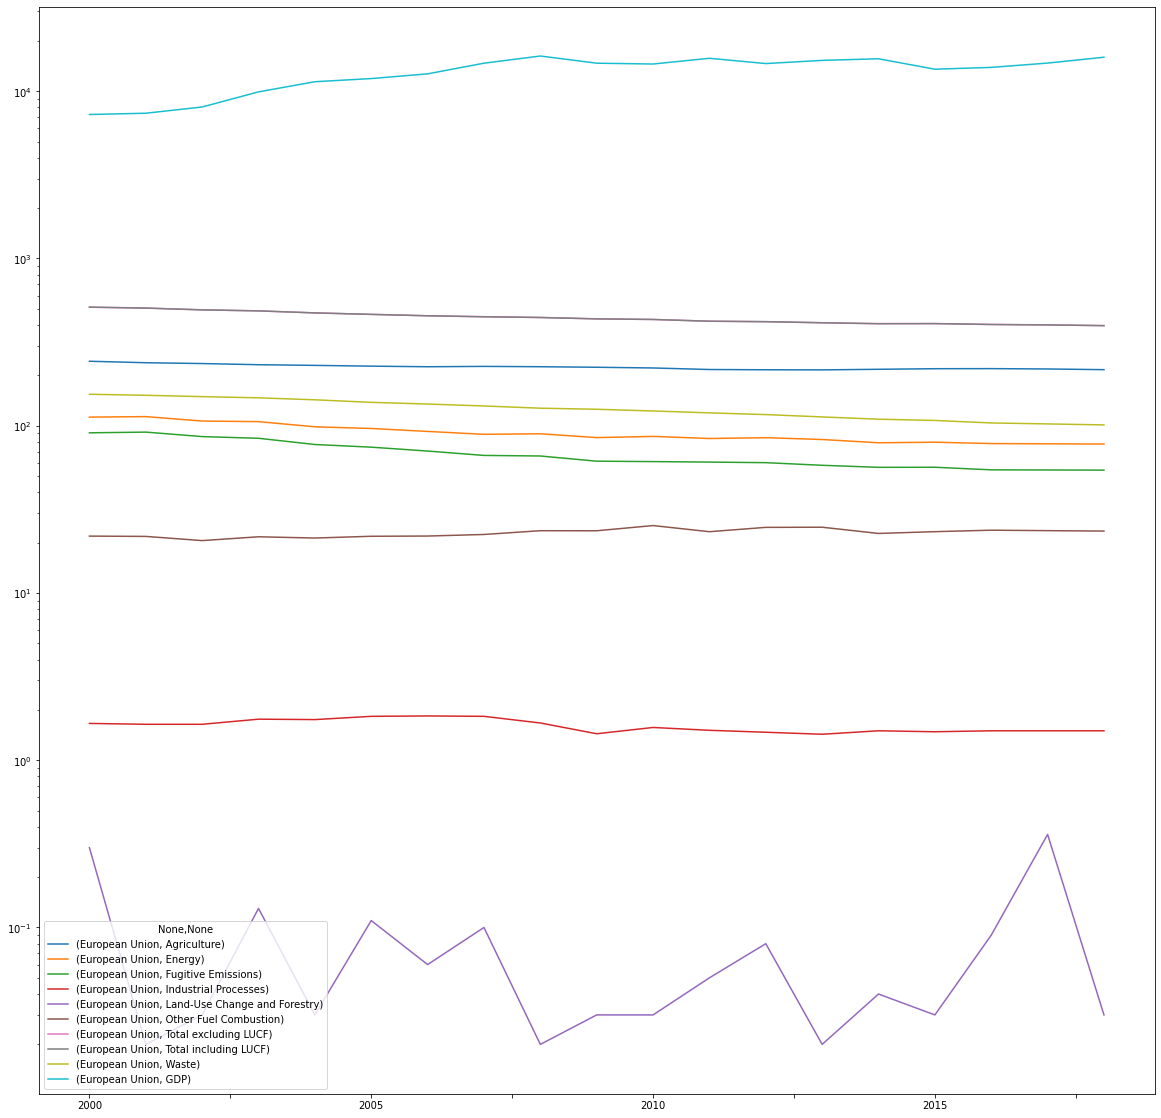

In [33]:
merged.xs('European Union', level=0 , drop_level=False).iloc[:,::-1].transpose().plot(kind="line", figsize=(20,20), legend=True, logy=True)

In [34]:
# merged_data_scaled.xs('1', level=0, drop_level=False).iloc[:,::-1].transpose().plot(kind="line", figsize=(20,20), legend=True, logy=True)

In [35]:
# See correlation between our values
merged.transpose().corr()[merged.transpose().corr()>0.7].dropna(how='all').dropna(how='all', axis=1)

Afghanistan                               \
                                   Agriculture    Energy Fugitive Emissions   
Afghanistan  Agriculture              1.000000       NaN           0.831290   
             Energy                        NaN  1.000000           0.970854   
             Fugitive Emissions       0.831290  0.970854           1.000000   
             Other Fuel Combustion         NaN  0.999966           0.968847   
             Total excluding LUCF     0.729702  0.999069           0.979145   
...                                        ...       ...                ...   
Samoa        GDP                      0.898885  0.866821           0.937881   
Yemen        GDP                      0.905186  0.706105           0.818142   
South Africa GDP                      0.904523       NaN           0.744414   
Zambia       GDP                      0.916472  0.827422           0.917679   
Zimbabwe     GDP                      0.782637  0.941044           0.952767   

                                                                               \
                                   Other Fuel Combustion Total excluding LUCF   
Afghanistan  Agriculture                             NaN             0.729702   
             Energy                             0.999966             0.999069   
             Fugitive Emissions                 0.968847             0.979145   
             Other Fuel Combustion              1.000000             0.998721   
             Total excluding LUCF               0.998721             1.000000   
...                                                  ...                  ...   
Samoa        GDP                                0.863480             0.884496   
Yemen        GDP                                0.701527             0.729908   
South Africa GDP                                     NaN                  NaN   
Zambia       GDP                                0.823464             0.847464   
Zimbabwe     GDP                                0.939657             0.946934   

                                                                      Albania  \
                                   Total including LUCF     Waste Agriculture   
Afghanistan  Agriculture                       0.729702  0.826301         NaN   
             Energy                            0.999069  0.943348         NaN   
             Fugitive Emissions                0.979145  0.968186         NaN   
             Other Fuel Combustion             0.998721  0.941520         NaN   
             Total excluding LUCF              1.000000  0.953337         NaN   
...                                                 ...       ...         ...   
Samoa        GDP                               0.884496  0.970794         NaN   
Yemen        GDP                               0.729908  0.783150         NaN   
South Africa GDP                                    NaN  0.807059         NaN   
Zambia       GDP                               0.847464  0.923467         NaN   
Zimbabwe     GDP                               0.946934  0.882365         NaN   

                                                                 ...  \
                                      Energy Fugitive Emissions  ...   
Afghanistan  Agriculture                 NaN                NaN  ...   
             Energy                 0.881161                NaN  ...   
             Fugitive Emissions     0.786860                NaN  ...   
             Other Fuel Combustion  0.883491                NaN  ...   
             Total excluding LUCF   0.873218                NaN  ...   
...                                      ...                ...  ...   
Samoa        GDP                    0.733364                NaN  ...   
Yemen        GDP                         NaN                NaN  ...   
South Africa GDP                         NaN                NaN  ...   
Zambia       GDP                         NaN                NaN  ...   
Zimbabwe     GDP                   

In [36]:
# Binary encoding Sector column
methane_emissions_encoded = pd.get_dummies(methane_same, columns=["Sector"])
methane_emissions_encoded.head()

,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,...,1990,Sector_Agriculture,Sector_Energy,Sector_Fugitive Emissions,Sector_Industrial Processes,Sector_Land-Use Change and Forestry,Sector_Other Fuel Combustion,Sector_Total excluding LUCF,Sector_Total including LUCF,Sector_Waste
Country,,,,,,,,,,,,,,,,,,,,,
China,1238.95,1239.28,1242.43,1237.79,1206.51,1178.21,1151.28,1106.41,1064.20,1019.28,...,730.78,0,0,0,0,0,0,0,1,0
China,1238.63,1239.13,1242.15,1237.52,1206.21,1178.02,1151.10,1106.19,1063.83,1018.91,...,730.34,0,0,0,0,0,0,1,0,0
Russia,853.00,852.12,856.00,837.01,833.59,827.06,827.98,817.70,804.22,776.75,...,933.79,0,0,0,0,0,0,0,1,0
Russia,849.57,850.17,852.55,835.56,830.22,825.64,824.27,814.67,801.36,774.47,...,929.97,0,0,0,0,0,0,1,0,0
China,739.58,741.73,743.88,746.03,723.02,700.01,677.00,635.32,593.65,552.07,...,216.60,0,1,0,0,0,0,0,0,0


In [37]:
# set up our target variable and features
y = methane_emissions_encoded["2018"]
X = methane_emissions_encoded.drop(columns=["2018", "1990"], axis=1)

In [38]:
# Initiate linear model
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [39]:
# Prediction
y_pred = regr.predict(X)
print(y_pred.shape)

(1676,)


In [40]:
# 
print(regr.coef_)
print(regr.intercept_)

[ 1.20409839  0.13173023 -0.57956365  0.44834119 -0.11605658 -0.13314634
  0.01249094 -0.07859509  0.16688182 -0.04297839 -0.10000512  0.30215701
 -0.20161821 -0.02175523  0.05576577 -0.16196983  0.18240841 -0.12922025
 -0.05424289 -0.021377    0.19661782  0.00683578 -0.03728216 -0.02218586
 -0.06179236  0.12158307 -0.06652817 -0.00595924 -0.02832441 -0.03484405
 -0.01572166 -0.02101552 -0.00572053  0.03974798  0.03553098  0.03630645]
0.01782005038806389


In [41]:
merged_df = methane_same.loc[methane_same['Sector']=="Total including LUCF"].merge(GDP_same, how='inner', left_index=True, right_index=True, validate="one_to_one", suffixes=["_gdp","_meth"])
#merged_df.dropna(how='any', axis=0, inplace=True)

In [42]:
merged_df.head()

,Sector,2018_gdp,2017_gdp,2016_gdp,2015_gdp,2014_gdp,2013_gdp,2012_gdp,2011_gdp,2010_gdp,...,2009_meth,2010_meth,2011_meth,2012_meth,2013_meth,2014_meth,2015_meth,2016_meth,2017_meth,2018_meth
China,Total including LUCF,1238.95,1239.28,1242.43,1237.79,1206.51,1178.21,1151.28,1106.41,1064.20,...,5.101703e+12,6.087164e+12,7.551500e+12,8.532230e+12,9.570406e+12,1.047568e+13,1.106155e+13,1.123328e+13,1.231041e+13,1.389482e+13
Russia,Total including LUCF,853.00,852.12,856.00,837.01,833.59,827.06,827.98,817.70,804.22,...,1.222644e+12,1.524917e+12,2.045926e+12,2.208296e+12,2.292473e+12,2.059242e+12,1.363481e+12,1.276787e+12,1.574199e+12,1.657329e+12
India,Total including LUCF,669.34,665.04,659.81,653.61,655.78,656.08,654.89,655.48,653.89,...,1.341887e+12,1.675615e+12,1.823050e+12,1.827638e+12,1.856722e+12,2.039127e+12,2.103588e+12,2.294798e+12,2.651473e+12,2.701112e+12
United States,Total including LUCF,623.77,615.77,609.89,618.27,621.45,619.02,618.71,628.73,650.38,...,1.444893e+13,1.499205e+13,1.554258e+13,1.619701e+13,1.678485e+13,1.752716e+13,1.823830e+13,1.874508e+13,1.954298e+13,2.061186e+13
Brazil,Total including LUCF,418.02,427.51,428.63,426.88,418.70,412.93,418.15,414.63,421.50,...,1.666996e+12,2.208838e+12,2.616157e+12,2.465228e+12,2.472819e+12,2.456044e+12,1.802212e+12,1.795693e+12,2.063515e+12,1.916934e+12


In [43]:
#merged_df.corr().style.bar(color="#d65f5f")

In [44]:
# methane_emissions_df.transpose().groupby('Sector').plot(kind='line',y="1990",use_index=False, figsize=(35,10), subplots=True, sharey=True)
#methane_emissions_df.plot(kind='line', figsize=(15,10), sharex=True, sharey=True, loglog=True)